In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,\
QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
diabetes = pd.read_csv('./Diabetes_dataset.csv')
features = ['Glucose', 'BloodPressure','SkinThickness','Insulin']
df_0 = diabetes.loc[diabetes.Outcome==0, features]
df_1 = diabetes.loc[diabetes.Outcome==1, features]

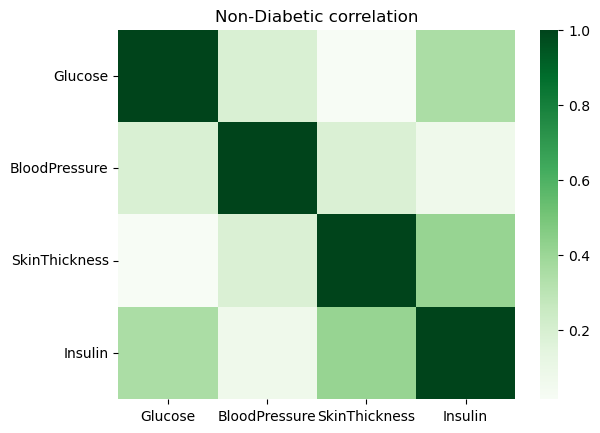

In [4]:
sns.heatmap(df_0.corr(),cmap='Greens').set(title = 'Non-Diabetic correlation')
plt.savefig('./corr_non_diabetic.png')

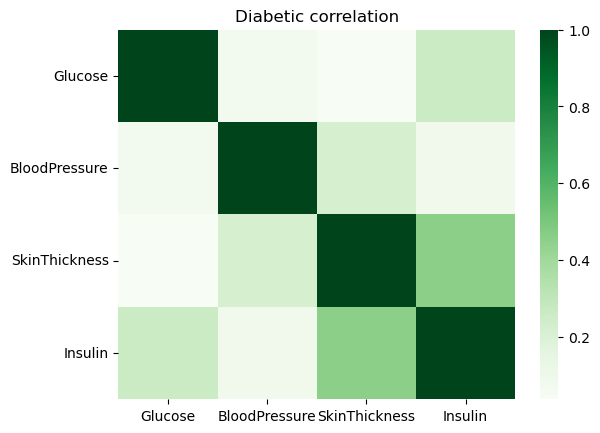

In [5]:
sns.heatmap(df_1.corr(),cmap='Greens').set(title = 'Diabetic correlation')
plt.savefig('./corr_diabetic.png')

###### Correlation Results
    1) Healthy:
        a) Highest: Skin Thickness & Insulin
        b) Lowest: Skin Thickness & Glucose
    2) Unhealthy:
        c) Highest: Skin Thickness & Insulin
        d) Lowest: Skin Thickness & Glucose

These results are the same for both classes

In [15]:
mu_sigma = pd.concat([df_0.describe().loc[['mean','std']],
           df_1.describe().loc[['mean','std']],
          diabetes[features].describe().loc[['mean','std']]],
                     keys = ['NonDiabetic','Diabetic','All']
         )
mu_sigma.round(2)

Glucose  BloodPressure  SkinThickness  Insulin
NonDiabetic mean   109.98          68.18          19.66    68.79
            std     26.14          18.06          14.89    98.87
Diabetic    mean   141.26          70.82          22.16   100.34
            std     31.94          21.49          17.68   138.69
All         mean   120.89          69.11          20.54    79.80
            std     31.97          19.36          15.95   115.24

All metrics increase in mean and std when going from NonDiabetic to Diabetic

1. apply Logistic regression
2. apply k-NN (k = 1, 3, 5)
3. apply Naive-Bayesian classifier
4. apply Linear Discriminant
5. apply Quadratic Discriminant
6. compute its confusion matrices and summarize results in
table below:

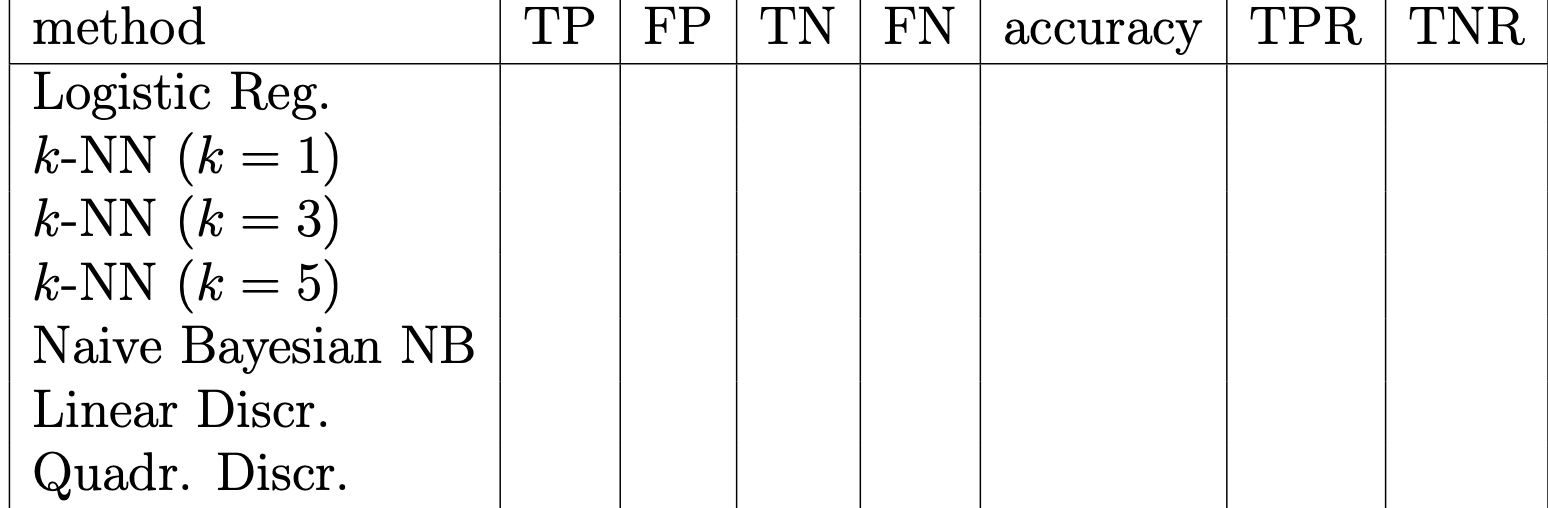

In [7]:
diabetes = diabetes[features+['Outcome']]
train,test = train_test_split(diabetes,test_size=.5,random_state=1)
train_y = train.pop('Outcome')
train_X = train
test_y = test.pop('Outcome')
test_X = test

In [8]:
lr = LogisticRegression()
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
nb= GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
models = [lr, knn_1, knn_3, knn_5, nb, lda, qda]

results = {'tp':[],'fp':[],'tn':[],'fn':[],'accuracy':[],'tpr':[],'tnr':[]}
model_labels = []
for m in models:
    m.fit (train_X,train_y),
    preds = m.predict(test_X)
    cm = confusion_matrix(test_y,preds)
    tp = cm[1,1]
    fp = cm[0,1]
    tn = cm[0,0]
    fn = cm[1,0]
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    tpr = tp/(tp+fn)
    tnr = tn/(tn+fp)
    print( str(m).split('(')[0])
    if results['tp']:
        results['tp'].append(tp)
        results['fp'].append(fp)
        results['tn'].append(tn)
        results['fn'].append(fn)
        results['accuracy'].append(accuracy)
        results['tpr'].append(tpr)
        results['tnr'].append(tnr)
    else:
        results['tp'] = [tp]
        results['fp'] = [fp]
        results['tn'] = [tn]
        results['fn'] = [fn]
        results['accuracy'] = [accuracy]
        results['tpr'] = [tpr]
        results['tnr'] = [tnr]
    model_labels.append(str(m).split('(')[0])

LogisticRegression
KNeighborsClassifier
KNeighborsClassifier
KNeighborsClassifier
GaussianNB
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis


In [9]:
results_df = pd.DataFrame.from_dict(results)
results_df.index = model_labels
results_df.round(2)

,tp,fp,tn,fn,accuracy,tpr,tnr
LogisticRegression,66,22,224,72,0.76,0.48,0.91
KNeighborsClassifier,73,60,186,65,0.67,0.53,0.76
KNeighborsClassifier,64,51,195,74,0.67,0.46,0.79
KNeighborsClassifier,58,39,207,80,0.69,0.42,0.84
GaussianNB,62,37,209,76,0.71,0.45,0.85
LinearDiscriminantAnalysis,64,21,225,74,0.75,0.46,0.91
QuadraticDiscriminantAnalysis,57,37,209,81,0.69,0.41,0.85


In [10]:
alist = ['a']
alist.append('b')
alist

['a', 'b']

In [11]:
bool(results['tp'])

True

In [12]:
str(qda).split('(')[0]

'QuadraticDiscriminantAnalysis'